In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [4]:
df = pd.read_csv("D:\\Downloads\\PubChem_compound_text_chemical compounds.csv")

In [5]:
df.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,89594,Nicotine,nicotine|L-Nicotine|54-11-5|(-)-Nicotine|(S)-N...,162.23,C10H14N2,16.1,147.0,1.2,12,0,...,112966,37613,Nicotine,Agrochemical Information|Biological Test Resul...,20,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,N - Nervous system > N07 - Other nervous syste...
1,40326,Permethrin,Permethrin|52645-53-1|Pounce|Permethrine|Perme...,391.30,C21H20Cl2O3,35.5,521.0,6.5,26,0,...,32864,11273,Permethrin,Agrochemical Information|Biological Test Resul...,19,880|881|894|1030|1188|1379|1452|1457|1460|1463...,20050327,10X CHEM|3B Scientific (Wuhan) Corp|3WAY PHARM...,Chemical Vendors|Curation Efforts|Governmental...,D004791 - Enzyme Inhibitors|D010575 - Pesticid...
2,14982,Glycyrrhizin,Glycyrrhizic acid|glycyrrhizin|1405-86-3|Glycy...,822.90,C42H62O16,267.0,1730.0,3.7,58,8,...,87315,43247,Glycyrrhizic Acid,Biological Test Results|Interactions and Pathw...,19,2517|86199|86201|265377|287075|288766|297145|2...,20040916,001Chemical|10X CHEM|3WAY PHARM INC|A2B Chem|A...,Chemical Vendors|Curation Efforts|Governmental...,A - Alimentary tract and metabolism > A05 - Bi...
3,2519,Caffeine,"caffeine|58-08-2|Guaranine|1,3,7-Trimethylxant...",194.19,C8H10N4O2,58.4,293.0,-0.1,14,0,...,125850,41299,Caffeine,Agrochemical Information|Biological Test Resul...,19,155|157|161|165|167|175|192|248|256|316|328|35...,20040916,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,C78272 - Agent Affecting Nervous System > C477...
4,338,Salicylic Acid,salicylic acid|2-Hydroxybenzoic acid|69-72-7|o...,138.12,C7H6O3,57.5,133.0,2.3,10,2,...,428643,148314,Salicylic Acid,Biological Test Results|Interactions and Pathw...,19,155|157|161|165|167|175|179|248|485|568|583|59...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,C254 - Anti-Infective Agent > C52588 - Antibac...


In [6]:
df.isnull().sum()

 cid                          0
cmpdname                      0
cmpdsynonym                   5
mw                            0
mf                            0
polararea                     0
complexity                    0
xlogp                      4952
heavycnt                      0
hbonddonor                    0
hbondacc                      0
rotbonds                      0
inchi                         0
smiles                        0
inchikey                      0
iupacname                    93
exactmass                     0
monoisotopicmass              0
charge                        0
covalentunitcnt               0
isotopeatomcnt                0
totalatomstereocnt            0
definedatomstereocnt          0
undefinedatomstereocnt        0
totalbondstereocnt            0
definedbondstereocnt          0
undefinedbondstereocnt        0
pclidcnt                      0
gpidcnt                       0
gpfamilycnt                   0
meshheadings              15501
annothit

In [8]:
# Keep only relevant columns
columns_to_keep = ["mw", "xlogp", "hbonddonor", "hbondacc"]
df_filtered = df[columns_to_keep]

# Display the updated dataframe
df_filtered.head()


,mw,xlogp,hbonddonor,hbondacc
0,162.23,1.2,0,2
1,391.30,6.5,0,3
2,822.90,3.7,8,16
3,194.19,-0.1,0,3
4,138.12,2.3,2,3


In [9]:
df_filtered.isnull().sum()

mw               0
xlogp         4952
hbonddonor       0
hbondacc         0
dtype: int64

In [10]:
missing_percentage = (4952 / len(df)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")


Missing Percentage: 31.26%


In [14]:
# Fill missing values with the median of each column
df_filtered["mw"] = df_filtered["mw"].fillna(df_filtered["mw"].median())
df_filtered["xlogp"] = df_filtered["xlogp"].fillna(df_filtered["xlogp"].median())

# Check if there are still missing values


C:\Users\DELL\AppData\Local\Temp\ipykernel_14200\520330081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["mw"] = df_filtered["mw"].fillna(df_filtered["mw"].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_14200\520330081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["xlogp"] = df_filtered["xlogp"].fillna(df_filtered["xlogp"].median())


In [15]:
df_filtered.isnull().sum()

mw            0
xlogp         0
hbonddonor    0
hbondacc      0
dtype: int64

In [16]:
# Function to check Lipinski compliance
def lipinski_compliance(row):
    rules_passed = sum([
        row["mw"] <= 500,
        row["xlogp"] <= 5,
        row["hbonddonor"] <= 5,
        row["hbondacc"] <= 10
    ])
    return 1 if rules_passed >= 3 else 0  # 1 = Compliant, 0 = Non-compliant

# Apply function to dataset
df_filtered["Lipinski_Compliant"] = df_filtered.apply(lipinski_compliance, axis=1)

# Display updated dataset


C:\Users\DELL\AppData\Local\Temp\ipykernel_14200\1962648500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Lipinski_Compliant"] = df_filtered.apply(lipinski_compliance, axis=1)


In [17]:
print(df_filtered.head())


       mw  xlogp  hbonddonor  hbondacc  Lipinski_Compliant
0  162.23    1.2           0         2                   1
1  391.30    6.5           0         3                   1
2  822.90    3.7           8        16                   0
3  194.19   -0.1           0         3                   1
4  138.12    2.3           2         3                   1


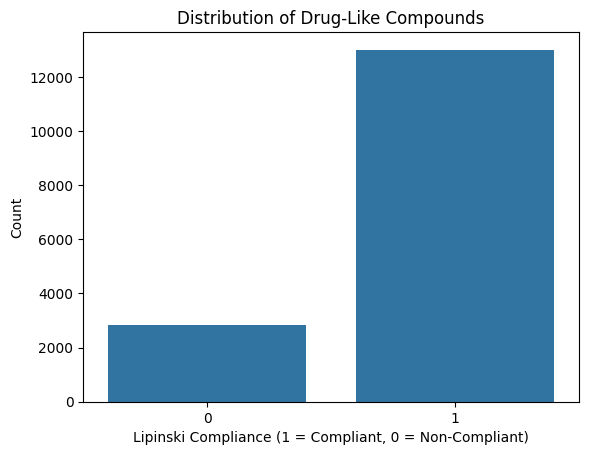

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_filtered["Lipinski_Compliant"])
plt.xlabel("Lipinski Compliance (1 = Compliant, 0 = Non-Compliant)")
plt.ylabel("Count")
plt.title("Distribution of Drug-Like Compounds")
plt.show()


In [24]:

# Select features (independent variables)
X = df_filtered[["mw", "xlogp", "hbonddonor", "hbondacc"]]

# Target variable (dependent variable)
y = df_filtered["Lipinski_Compliant"]

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")


Training samples: 12671, Test samples: 3168


In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       551
           1       0.97      0.98      0.97      2617

    accuracy                           0.95      3168
   macro avg       0.93      0.91      0.92      3168
weighted avg       0.95      0.95      0.95      3168



In [27]:
import numpy as np

# Get feature importance from Logistic Regression coefficients
importance = np.abs(model.coef_)[0]  # Take absolute values

# Print feature importance
features = ["mw", "xlogp", "hbonddonor", "hbondacc"]
for feat, imp in zip(features, importance):
    print(f"{feat}: {imp:.4f}")


mw: 0.0093
xlogp: 0.6553
hbonddonor: 0.5772
hbondacc: 0.6876


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & evaluation
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00      2617

    accuracy                           1.00      3168
   macro avg       1.00      1.00      1.00      3168
weighted avg       1.00      1.00      1.00      3168



In [29]:
import pandas as pd

# Get feature importance
rf_importance = rf_model.feature_importances_

# Create DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df)


      Feature  Importance
3    hbondacc    0.440517
0          mw    0.319739
2  hbonddonor    0.152314
1       xlogp    0.087429


In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5 folds)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 1.00


In [31]:
import numpy as np
y_train_shuffled = np.random.permutation(y_train)  # Shuffle labels
rf_model.fit(X_train, y_train_shuffled)

y_pred_shuffled = rf_model.predict(X_test)
print(f"Accuracy with Shuffled Labels: {accuracy_score(y_test, y_pred_shuffled):.2f}")


Accuracy with Shuffled Labels: 0.78


C:\Users\DELL\AppData\Local\Temp\ipykernel_14200\3826406726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Lipinski_Compliant"] = y


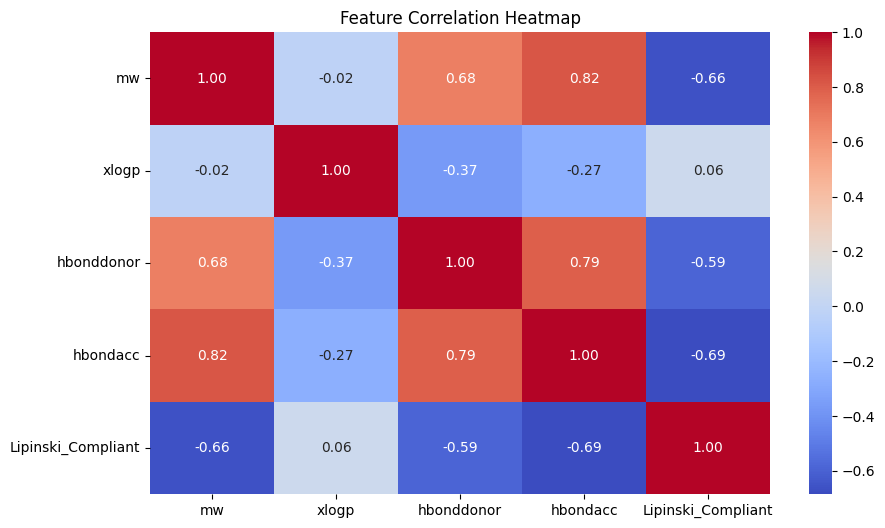

In [32]:

# Add target variable back to dataset
df_filtered["Lipinski_Compliant"] = y

# Check correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [33]:
X_train_reduced = X_train.drop(columns=["hbondacc", "mw"])
X_test_reduced = X_test.drop(columns=["hbondacc", "mw"])

rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Reduced Feature Accuracy: {accuracy_score(y_test, y_pred_reduced):.2f}")


Reduced Feature Accuracy: 0.92


In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model_reduced, X_train_reduced, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.91


In [35]:
feature_importance = pd.DataFrame({
    "Feature": X_train_reduced.columns,
    "Importance": rf_model_reduced.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


      Feature  Importance
1  hbonddonor    0.753707
0       xlogp    0.246293


In [36]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_reduced, y_train)
y_pred_lr = lr_model.predict(X_test_reduced)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")


Logistic Regression Accuracy: 0.91


In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_reduced, y_train)
y_pred_xgb = xgb_model.predict(X_test_reduced)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")


XGBoost Accuracy: 0.92


In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize model
xgb_model = XGBClassifier()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_reduced, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.9158706600100566


In [41]:
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_reduced)

# Final accuracy
from sklearn.metrics import accuracy_score
print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))


Final XGBoost Accuracy: 0.9119318181818182


In [42]:
best_xgb = XGBClassifier(
    colsample_bytree=1.0, learning_rate=0.01, max_depth=5,
    n_estimators=500, subsample=0.8
)
best_xgb.fit(X_train_reduced, y_train)

y_pred_final = best_xgb.predict(X_test_reduced)
print("Final Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_final))


Final Tuned XGBoost Accuracy: 0.9195075757575758


In [43]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define XGBoost model
xgb_model = XGBClassifier(
    colsample_bytree=1.0, learning_rate=0.01, max_depth=5,
    n_estimators=200, subsample=0.8
)

# Define Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42
)

# Create the ensemble using Voting Classifier
hybrid_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='soft'  # Use probability-based averaging
)

# Train the hybrid model
hybrid_model.fit(X_train_reduced, y_train)

# Predictions
y_pred_hybrid = hybrid_model.predict(X_test_reduced)

# Evaluate performance
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print("Hybrid Model Accuracy:", accuracy_hybrid)
print("Classification Report:\n", classification_report(y_test, y_pred_hybrid))


Hybrid Model Accuracy: 0.9081439393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69       551
           1       0.92      0.98      0.95      2617

    accuracy                           0.91      3168
   macro avg       0.88      0.78      0.82      3168
weighted avg       0.90      0.91      0.90      3168



In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X contains 'mw', 'xlogp', etc.

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define MLP Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    Dropout(0.3),  # Prevent overfitting
    Dense(8, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"MLP Test Accuracy: {test_acc:.4f}")


Epoch 1/50


B:\Projects\IITD\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7994 - loss: 0.5198 - val_accuracy: 0.9441 - val_loss: 0.1468
Epoch 2/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9451 - loss: 0.1484 - val_accuracy: 0.9634 - val_loss: 0.0933
Epoch 3/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9571 - loss: 0.1069 - val_accuracy: 0.9681 - val_loss: 0.0780
Epoch 4/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9585 - loss: 0.1014 - val_accuracy: 0.9700 - val_loss: 0.0725
Epoch 5/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.0913 - val_accuracy: 0.9697 - val_loss: 0.0697
Epoch 6/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9629 - loss: 0.0901 - val_accuracy: 0.9716 - val_loss: 0.0680
Epoch 7/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9652 - loss: 0.0847 - val_accuracy: 0.9722 - val_loss: 0.0664
Epoch 8/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9613 - loss: 0.0909 - val_accuracy: 0.9706 - val_

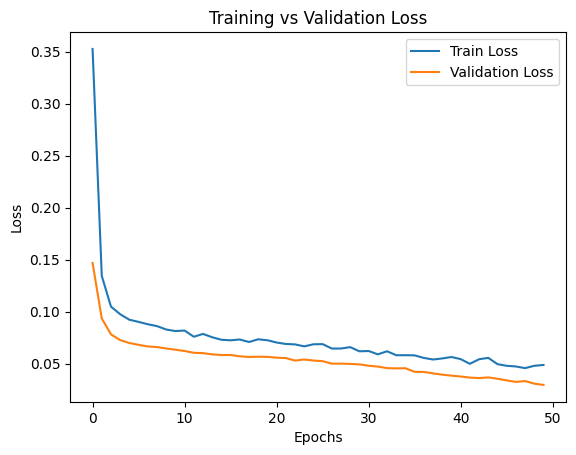

In [46]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [49]:
import joblib

# Save model
joblib.dump(model, "trial1.h5")  # Use the trained MLP model variable
print("Model saved as trial1.h5")


Model saved as trial1.h5


In [51]:
from tensorflow.keras.models import load_model

# Load the model from the .pkl file (if it's a valid Scikit-Learn model)
import joblib
model = joblib.load("trial1.pkl")  # Load the old model

# If it's actually a Keras model, save it in H5 or Keras format
model.save("trial2.h5")  # Save in H5 format
model.save("trial2.keras")  # Save in Keras 3 format (Recommended)
